# Census: Imputation of Missing Years & Population

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Import & Check Census File

In [23]:
path = r"/Users/patel/Documents/CF-Data Anaylst Course/portfolio_projects/mbs_analysis/datasets/"

df_census_2011_16_21 = pd.read_pickle(
    os.path.join(path, "clean_datasets/census_data/2011_16_21_census_combined.pkl")
)
df_census_2011_16_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SA3                      1066 non-null   object
 1   age_0-14                 1066 non-null   int64 
 2   age_15-24                1066 non-null   int64 
 3   age_25-44                1066 non-null   int64 
 4   age_45-64                1066 non-null   int64 
 5   age_65-79                1066 non-null   int64 
 6   age_80+                  1066 non-null   int64 
 7   negative_income          1066 non-null   int64 
 8   no_income                1066 non-null   int64 
 9   average_income_$5200     1066 non-null   int64 
 10  average_income_$13000    1066 non-null   int64 
 11  average_income_$18200    1066 non-null   int64 
 12  average_income_$26000    1066 non-null   int64 
 13  average_income_$36400    1066 non-null   int64 
 14  average_income_$46800    1066 non-null  

In [24]:
df_census_2011_16_21["Year"] = df_census_2011_16_21["Year"].astype("str").str.strip()
df_census_2011_16_21["Year"] = pd.to_numeric(df_census_2011_16_21["Year"])
df_census_2011_16_21["Year"].dtype

dtype('int64')

### Explore Census Data

Explore population trends to determine appropriate interpolation method to apply to populate missing years

#### Total Population By Year

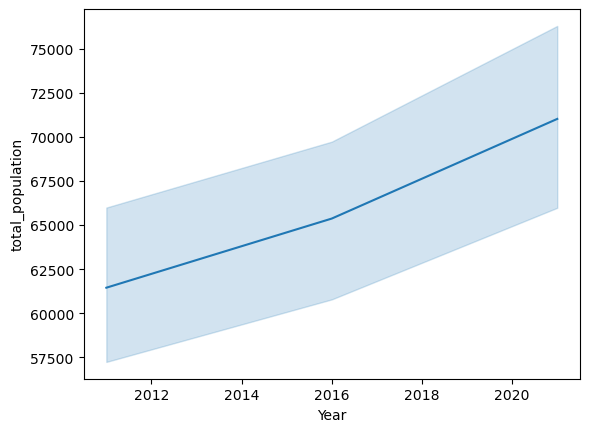

In [25]:
line = sns.lineplot(x="Year", y="total_population", data=df_census_2011_16_21)

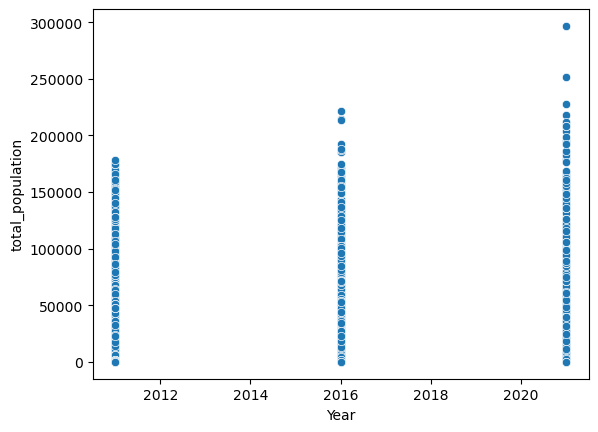

In [26]:
scatter_age_income = sns.scatterplot(
    x="Year", y="total_population", data=df_census_2011_16_21
)

Positive correlation between year and total population. Population of Australia has been on an upward trend from 2011 to 2021

#### Population by Gender & Year

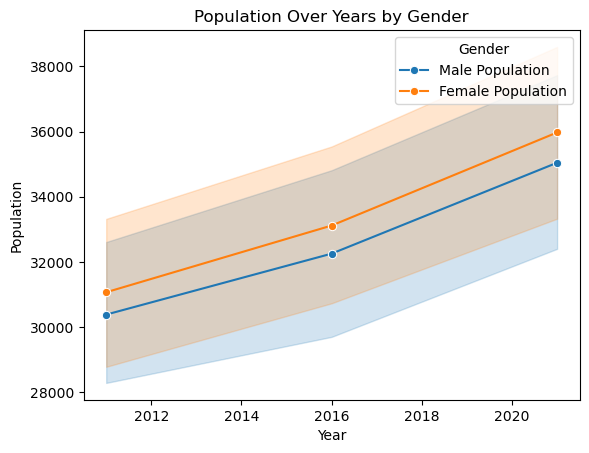

In [27]:
sns.lineplot(
    x="Year",
    y="male_pop",
    data=df_census_2011_16_21,
    label="Male Population",
    marker="o",
)

# Plot the second line for 'female_pop' on the same axes
sns.lineplot(
    x="Year",
    y="female_pop",
    data=df_census_2011_16_21,
    label="Female Population",
    marker="o",
)

# Enhance the plot with title, labels, and legend
plt.title("Population Over Years by Gender")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Gender")

Upward linear trend of male and female population from 2011 to 2021. 

#### Population by Age & Years

In [28]:
df_census_2011_16_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SA3                      1066 non-null   object
 1   age_0-14                 1066 non-null   int64 
 2   age_15-24                1066 non-null   int64 
 3   age_25-44                1066 non-null   int64 
 4   age_45-64                1066 non-null   int64 
 5   age_65-79                1066 non-null   int64 
 6   age_80+                  1066 non-null   int64 
 7   negative_income          1066 non-null   int64 
 8   no_income                1066 non-null   int64 
 9   average_income_$5200     1066 non-null   int64 
 10  average_income_$13000    1066 non-null   int64 
 11  average_income_$18200    1066 non-null   int64 
 12  average_income_$26000    1066 non-null   int64 
 13  average_income_$36400    1066 non-null   int64 
 14  average_income_$46800    1066 non-null  

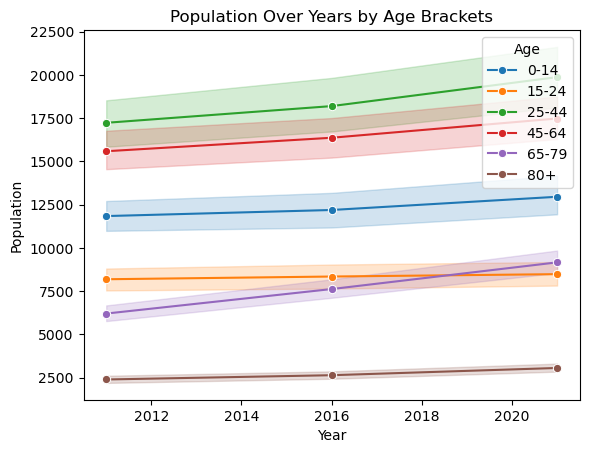

In [29]:
sns.lineplot(
    x="Year",
    y="age_0-14",
    data=df_census_2011_16_21,
    label="0-14",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="age_15-24",
    data=df_census_2011_16_21,
    label="15-24",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="age_25-44",
    data=df_census_2011_16_21,
    label="25-44",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="age_45-64",
    data=df_census_2011_16_21,
    label="45-64",
    marker="o",
)

sns.lineplot(
    x="Year",
    y="age_65-79",
    data=df_census_2011_16_21,
    label="65-79",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="age_80+",
    data=df_census_2011_16_21,
    label="80+",
    marker="o",
)

plt.title("Population Over Years by Age Brackets")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Age")

<Axes: xlabel='Year', ylabel='age_15-24'>

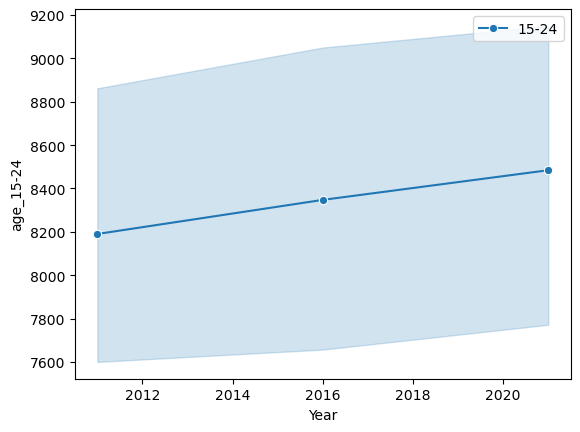

In [30]:
# checking age 15-24 trend as its not clear on previous graph.
sns.lineplot(
    x="Year",
    y="age_15-24",
    data=df_census_2011_16_21,
    label="15-24",
    marker="o",
)

For all age brackets, population from 2011 to 2021 has increased linearly

#### Population by Income & Year

In [31]:
df_census_2011_16_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   SA3                      1066 non-null   object
 1   age_0-14                 1066 non-null   int64 
 2   age_15-24                1066 non-null   int64 
 3   age_25-44                1066 non-null   int64 
 4   age_45-64                1066 non-null   int64 
 5   age_65-79                1066 non-null   int64 
 6   age_80+                  1066 non-null   int64 
 7   negative_income          1066 non-null   int64 
 8   no_income                1066 non-null   int64 
 9   average_income_$5200     1066 non-null   int64 
 10  average_income_$13000    1066 non-null   int64 
 11  average_income_$18200    1066 non-null   int64 
 12  average_income_$26000    1066 non-null   int64 
 13  average_income_$36400    1066 non-null   int64 
 14  average_income_$46800    1066 non-null  

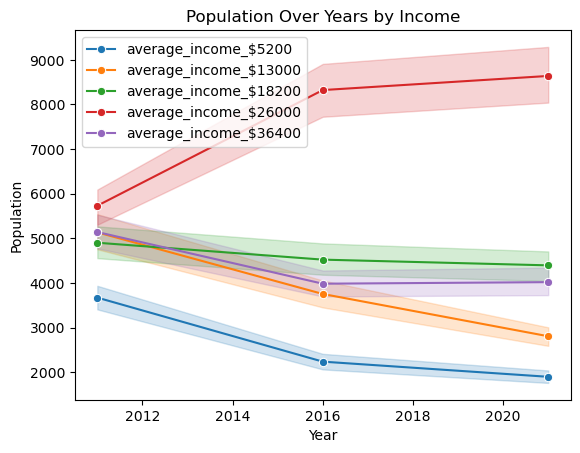

In [32]:
# income between $5,200 and 36,400
sns.lineplot(
    x="Year",
    y="average_income_$5200",
    data=df_census_2011_16_21,
    label="average_income_$5200",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="average_income_$13000",
    data=df_census_2011_16_21,
    label="average_income_$13000",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="average_income_$18200",
    data=df_census_2011_16_21,
    label="average_income_$18200",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="average_income_$26000",
    data=df_census_2011_16_21,
    label="average_income_$26000",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="average_income_$36400",
    data=df_census_2011_16_21,
    label="average_income_$36400",
    marker="o",
)

plt.title("Population Over Years by Income")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend().set_visible(True)

Income brackets between $5,200 and 36,400 had general downward trends except median income 26,000

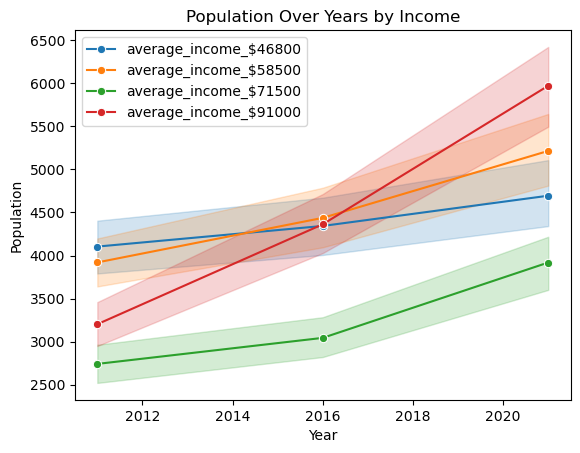

In [33]:
# income between 46,800 to 91,000
sns.lineplot(
    x="Year",
    y="average_income_$46800",
    data=df_census_2011_16_21,
    label="average_income_$46800",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="average_income_$58500",
    data=df_census_2011_16_21,
    label="average_income_$58500",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="average_income_$71500",
    data=df_census_2011_16_21,
    label="average_income_$71500",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="average_income_$91000",
    data=df_census_2011_16_21,
    label="average_income_$91000",
    marker="o",
)

plt.title("Population Over Years by Income")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend().set_visible(True)

Income between 46,800 to 91,000 had an linear upward trend.

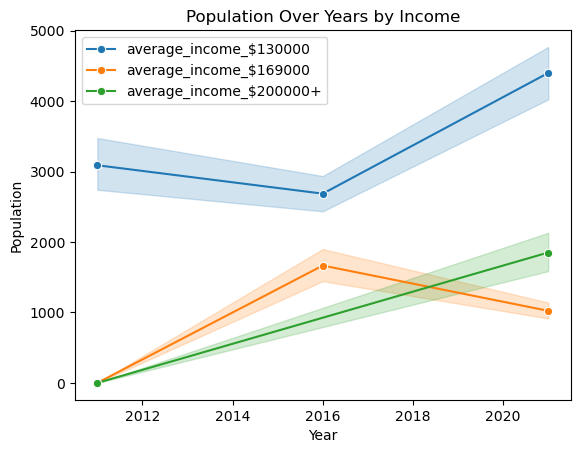

In [34]:
# income between 130,000 to 200,000+
sns.lineplot(
    x="Year",
    y="average_income_$130000",
    data=df_census_2011_16_21,
    label="average_income_$130000",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="average_income_$169000",
    data=df_census_2011_16_21,
    label="average_income_$169000",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="average_income_$200000+",
    data=df_census_2011_16_21,
    label="average_income_$200000+",
    marker="o",
)
plt.title("Population Over Years by Income")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend().set_visible(True)

Income between 130,000 has down and then upward trend. That is expected since in 2011 all income above 103,000 was in one bracket, whereas 2016 had its own bracket, reducing the population number in 2016

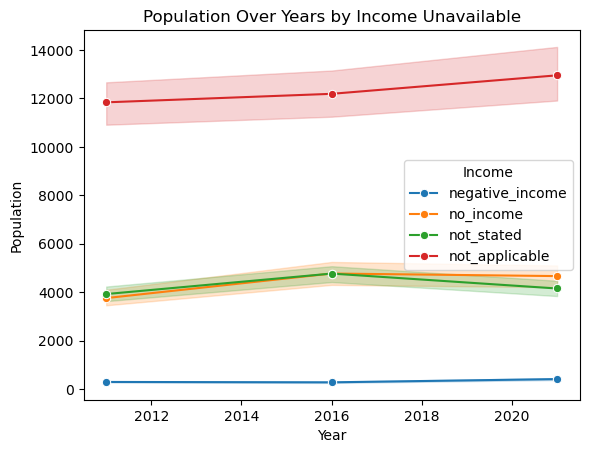

In [35]:
sns.lineplot(
    x="Year",
    y="negative_income",
    data=df_census_2011_16_21,
    label="negative_income",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="no_income",
    data=df_census_2011_16_21,
    label="no_income",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="not_stated",
    data=df_census_2011_16_21,
    label="not_stated",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="not_applicable",
    data=df_census_2011_16_21,
    label="not_applicable",
    marker="o",
)

plt.title("Population Over Years by Income Unavailable")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Income")

Number of not stated, not applicable, negative income and no income is approximately the same between 2011 to 2021

The trends across majority of the columns are linear. Hence, linear interpolation method will be used to fill in the population of misisng years between 2011 to 2022

## Create Complete Census Dataset

Census has population data of 2011, 2016 and 2021. For a complete dataset, missing years and corresponding population data will need to be added to the dataset

Linear interpolation will be used to fill in the population data

### Add missing years

In [36]:
# Step 1: Generate the range of years
years = range(2011, 2023)  # Up to 2023

# Step 2: Create a DataFrame of all combinations of SA3 and missing years
sa3_values = df_census_2011_16_21["SA3"].unique()
all_sa3_year_combinations = pd.MultiIndex.from_product(
    [sa3_values, years], names=["SA3", "Year"]
).to_frame(index=False)

# check the dataframe has 358 SA3 values for each year
all_sa3_year_combinations.groupby(by=["Year"], as_index=False).count()

,Year,SA3
0,2011,358
1,2012,358
2,2013,358
3,2014,358
4,2015,358
5,2016,358
6,2017,358
7,2018,358
8,2019,358
9,2020,358


In [37]:
# Step 3: Merge with original data to insert missing years
df_census_2011_2022 = pd.merge(
    all_sa3_year_combinations, df_census_2011_16_21, on=["SA3", "Year"], how="left"
)
# check the merge was successfull
df_census_2011_2022.head(6)

,SA3,Year,age_0-14,age_15-24,age_25-44,age_45-64,age_65-79,age_80+,negative_income,no_income,...,average_income_$71500,average_income_$91000,average_income_$130000,not_stated,not_applicable,male_pop,female_pop,total_population,average_income_$200000+,average_income_$169000
0,10102,2011,11025.0,6762.0,15554.0,14760.0,4171.0,1239.0,174.0,2503.0,...,3528.0,4495.0,4085.0,3007.0,11025.0,26852.0,26660.0,53511.0,0,0
1,10102,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
2,10102,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
3,10102,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
4,10102,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
5,10102,2016,11235.0,6877.0,15839.0,16352.0,5629.0,1395.0,161.0,3063.0,...,3639.0,5532.0,4091.0,4308.0,11235.0,28830.0,28502.0,57333.0,<NA>,1812


### Linear Interpolate Missing Populatoin

In [44]:
df_census_2011_2022.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4296 entries, ('10102', 2011) to ('99999', 2022)
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_0-14                 1066 non-null   float64
 1   age_15-24                1066 non-null   float64
 2   age_25-44                1066 non-null   float64
 3   age_45-64                1066 non-null   float64
 4   age_65-79                1066 non-null   float64
 5   age_80+                  1066 non-null   float64
 6   negative_income          1066 non-null   float64
 7   no_income                1066 non-null   float64
 8   average_income_$5200     1066 non-null   float64
 9   average_income_$13000    1066 non-null   float64
 10  average_income_$18200    1066 non-null   float64
 11  average_income_$26000    1066 non-null   float64
 12  average_income_$36400    1066 non-null   float64
 13  average_income_$46800    1066 non-null   float64
 14 

AttributeError: 'NoneType' object has no attribute 'to_clipboard'

In [39]:
# convert columns with Int64 to float64 or else it will be rejected by the interpolation function
df_census_2011_2022["average_income_$200000+"] = df_census_2011_2022[
    "average_income_$200000+"
].astype("float64")
df_census_2011_2022["average_income_$169000"] = df_census_2011_2022[
    "average_income_$169000"
].astype("float64")
df_census_2011_2022.columns

Index(['SA3', 'Year', 'age_0-14', 'age_15-24', 'age_25-44', 'age_45-64',
       'age_65-79', 'age_80+', 'negative_income', 'no_income',
       'average_income_$5200', 'average_income_$13000',
       'average_income_$18200', 'average_income_$26000',
       'average_income_$36400', 'average_income_$46800',
       'average_income_$58500', 'average_income_$71500',
       'average_income_$91000', 'average_income_$130000', 'not_stated',
       'not_applicable', 'male_pop', 'female_pop', 'total_population',
       'average_income_$200000+', 'average_income_$169000'],
      dtype='object')

In [40]:
# Step 2: Set 'SA3' and 'Year' as a MultiIndex
df_census_2011_2022.set_index(["SA3", "Year"], inplace=True)

# Sort the index to ensure the interpolation works correctly
df_census_2011_2022.sort_index(inplace=True)

In [41]:
# Step 3: Perform linear interpolation for male and female population
df_census_2011_2022_complete = df_census_2011_2022.groupby(
    "SA3", group_keys=False
).apply(lambda group: group.interpolate(method="linear"))

In [42]:
# Step 4: Reset the index if you want to return to the original DataFrame format
df_census_2011_2022_complete.reset_index(inplace=True)

# Check the result
df_census_2011_2022_complete.head(20)

,SA3,Year,age_0-14,age_15-24,age_25-44,age_45-64,age_65-79,age_80+,negative_income,no_income,...,average_income_$71500,average_income_$91000,average_income_$130000,not_stated,not_applicable,male_pop,female_pop,total_population,average_income_$200000+,average_income_$169000
0,10102,2011,11025.0,6762.0,15554.0,14760.0,4171.0,1239.0,174.0,2503.0,...,3528.0,4495.0,4085.0,3007.0,11025.0,26852.0,26660.0,53511.0,0.0,0.0
1,10102,2012,11067.0,6785.0,15611.0,15078.4,4462.6,1270.2,171.4,2615.0,...,3550.2,4702.4,4086.2,3267.2,11067.0,27247.6,27028.4,54275.4,228.6,362.4
2,10102,2013,11109.0,6808.0,15668.0,15396.8,4754.2,1301.4,168.8,2727.0,...,3572.4,4909.8,4087.4,3527.4,11109.0,27643.2,27396.8,55039.8,457.2,724.8
3,10102,2014,11151.0,6831.0,15725.0,15715.2,5045.8,1332.6,166.2,2839.0,...,3594.6,5117.2,4088.6,3787.6,11151.0,28038.8,27765.2,55804.2,685.8,1087.2
4,10102,2015,11193.0,6854.0,15782.0,16033.6,5337.4,1363.8,163.6,2951.0,...,3616.8,5324.6,4089.8,4047.8,11193.0,28434.4,28133.6,56568.6,914.4,1449.6
5,10102,2016,11235.0,6877.0,15839.0,16352.0,5629.0,1395.0,161.0,3063.0,...,3639.0,5532.0,4091.0,4308.0,11235.0,28830.0,28502.0,57333.0,1143.0,1812.0
6,10102,2017,11516.6,6896.2,16413.4,16619.0,5904.4,1469.4,180.4,3075.8,...,3768.8,5993.8,4637.2,4085.0,11516.6,29596.8,29226.0,58825.0,1371.6,1725.2
7,10102,2018,11798.2,6915.4,16987.8,16886.0,6179.8,1543.8,199.8,3088.6,...,3898.6,6455.6,5183.4,3862.0,11798.2,30363.6,29950.0,60317.0,1600.2,1638.4
8,10102,2019,12079.8,6934.6,17562.2,17153.0,6455.2,1618.2,219.2,3101.4,...,4028.4,6917.4,5729.6,3639.0,12079.8,31130.4,30674.0,61809.0,1828.8,1551.6
9,10102,2020,12361.4,6953.8,18136.6,17420.0,6730.6,1692.6,238.6,3114.2,...,4158.2,7379.2,6275.8,3416.0,12361.4,31897.2,31398.0,63301.0,2057.4,1464.8


In [47]:
df_census_2011_2022_complete.dtypes

SA3                         object
Year                         int64
age_0-14                   float64
age_15-24                  float64
age_25-44                  float64
age_45-64                  float64
age_65-79                  float64
age_80+                    float64
negative_income            float64
no_income                  float64
average_income_$5200       float64
average_income_$13000      float64
average_income_$18200      float64
average_income_$26000      float64
average_income_$36400      float64
average_income_$46800      float64
average_income_$58500      float64
average_income_$71500      float64
average_income_$91000      float64
average_income_$130000     float64
not_stated                 float64
not_applicable             float64
male_pop                   float64
female_pop                 float64
total_population           float64
average_income_$200000+    float64
average_income_$169000     float64
dtype: object

## Data Consistency Checks

In [49]:
# checking summary statistics for missing or odd values
df_census_2011_2022_complete.describe()

,Year,age_0-14,age_15-24,age_25-44,age_45-64,age_65-79,age_80+,negative_income,no_income,average_income_$5200,...,average_income_$71500,average_income_$91000,average_income_$130000,not_stated,not_applicable,male_pop,female_pop,total_population,average_income_$200000+,average_income_$169000
count,4296.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,...,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4256.000000,4216.000000,4256.000000
mean,2016.500000,12387.312030,8374.958882,18559.543938,16581.647086,7811.246711,2732.915648,325.686795,4495.520442,2483.327773,...,3270.962406,4627.308741,3366.339521,4360.870536,12387.312735,32800.031015,33647.719925,66447.741541,1015.471300,1040.845865
std,3.452454,9446.066437,6540.162931,15212.989803,11167.591205,5431.947942,2124.133362,279.762526,4097.676125,1956.803742,...,2546.152330,3784.524800,3249.064236,3044.611527,9446.065804,23315.321003,24022.355460,47311.022956,1732.079222,1502.957430
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.750000,6433.350000,3933.850000,8198.500000,8873.250000,3854.000000,1203.500000,150.000000,1861.100000,1161.650000,...,1435.700000,1910.250000,1082.300000,2305.750000,6433.350000,17245.650000,17256.500000,34573.150000,120.900000,187.750000
50%,2016.500000,9839.300000,6646.500000,14479.700000,14429.000000,6998.300000,2389.300000,260.100000,3226.000000,2013.400000,...,2644.700000,3657.000000,2365.400000,3742.000000,9839.300000,27508.200000,28314.200000,55916.400000,435.700000,559.500000
75%,2019.250000,16431.650000,11319.300000,25565.550000,22511.850000,10780.050000,3779.000000,411.000000,5780.450000,3310.400000,...,4568.850000,6420.950000,4613.100000,5652.050000,16431.650000,44115.000000,45980.200000,89912.250000,1143.000000,1275.500000
max,2022.000000,74874.000000,40357.000000,110560.000000,55602.000000,33680.000000,12294.000000,2204.000000,26787.000000,13276.000000,...,16555.000000,25960.000000,26688.000000,27238.000000,74874.000000,149962.000000,146783.000000,296748.000000,17716.000000,15561.000000


In [53]:
# investigating missing values
df_census_2011_2022_complete[df_census_2011_2022_complete["age_0-14"].isna()]

,SA3,Year,age_0-14,age_15-24,age_25-44,age_45-64,age_65-79,age_80+,negative_income,no_income,...,average_income_$71500,average_income_$91000,average_income_$130000,not_stated,not_applicable,male_pop,female_pop,total_population,average_income_$200000+,average_income_$169000
48,10106,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,10106,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,10106,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,10106,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,10106,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,21704,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1909,21704,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910,21704,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911,21704,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,21704,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Found 8 SA3 level codes had no population data because these areas were not recognised in 2011. They were added in 2016 

In [58]:
df_census_2011_2022_complete[
    df_census_2011_2022_complete["average_income_$200000+"].isna()
][["SA3", "Year", "average_income_$200000+"]]

Found the 8 SA3 levels did not have income values for average_income_$200000. The income braclet was introduced in 2021 census. Hence why, 80 values are blank

In [43]:
df_census_2011_2022_complete.to_pickle(
    os.path.join(path, "clean_datasets/mbs_data/2011-23_census_complete.pkl")
)